# Load

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from wind_tools import *
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
from windrose import WindroseAxes
import matplotlib.pyplot as plt
from collections import namedtuple
sns.set(style='whitegrid')

matplotlib.rcParams['figure.figsize'] = (14,12)
# import matplotlib.font_manager
# matplotlib.rcParams['font.sans-serif'] = "Open-Sans"

In [ ]:
date_range = "index > '2020-08-13' and index < '2020-08-27 09:00'"
Anems = namedtuple("Anemometers", 'WM1 WM2 TrsH TrsV')

In [ ]:
def add_to_index(df, time='30min'):
    df.index += pd.Timedelta(time)
    return df

## Load High Freq data

In [ ]:
in_dir = Path('2020_data/data_field_v2_from_20208010/preprocessed/')
names = [
    '*_WM_174605_com1.csv',
    '*_WM_174613_com4.csv',
     "*_TRS_M00506_com3.csv",
    "*_TRS_M00507_com2.csv",
]

In [ ]:
def make_long_df(name_re, in_dir=in_dir):
    return pd.concat([load_high_freq_data(f) for f in in_dir.glob(name_re)])

In [ ]:
data_v2 = Anems(*map(lambda x: make_long_df(x)
                  .query(date_range)
                  .pipe(add_angle_attack)
                  .pipe(add_wind_dir),
                  names))

not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200827-1518_WM_174605_com1.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200827-1507_WM_174605_com1.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200827-1519_WM_174605_com1.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200830-1359_WM_174605_com1.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200830-1358_WM_174605_com1.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200826-1059_WM_174613_com4.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200811-1759_WM_174613_com4.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200822-0459_WM_174613_com4.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200818-0259_WM_174613_com4.csv
not enough data 2020_data/data_field_v2_from_20208010/preprocessed/20200825-0459_WM_174613_com4.csv


In [ ]:
dir_filt = filter_by_wind_dir(data_v2.WM1, 250, 30)

In [ ]:
aoa_filt = data_v2.WM1.angle_attack.between(-30, 30)

In [ ]:
dir_filt_strict = filter_by_wind_dir(data_v2.WM1, 250, 15)

In [ ]:
aoa_filt_strict = data_v2.WM1.angle_attack.between(-15, 15)

### filters

In [ ]:
amount_good_dir = dir_filt.resample('5min').apply(lambda x: x.sum()/x.count())  

In [ ]:
amount_good_aoa = aoa_filt.resample('5min').apply(lambda x: x.sum()/x.count()) 

In [ ]:
amount_good_dir_strict = dir_filt_strict.resample('5min').apply(lambda x: x.sum()/x.count())  

In [ ]:
amount_good_aoa_strict = aoa_filt_strict.resample('5min').apply(lambda x: x.sum()/x.count()) 

<AxesSubplot:xlabel='angle_attack'>

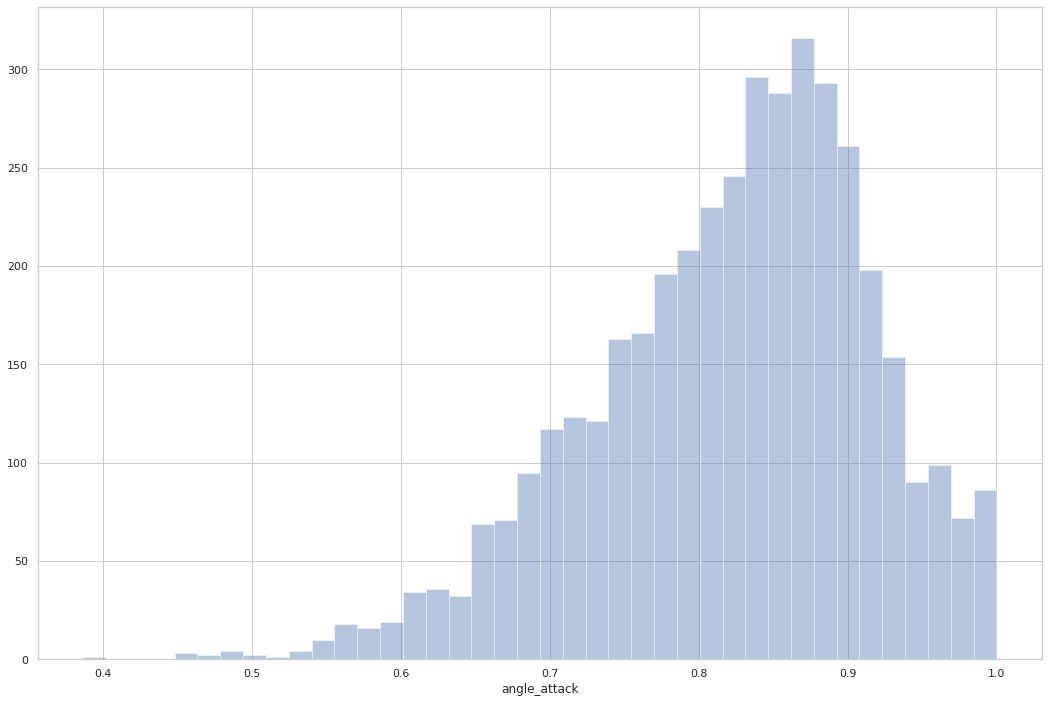

In [ ]:
sns.distplot(amount_good_aoa, kde=False)

<AxesSubplot:xlabel='wind_dir'>

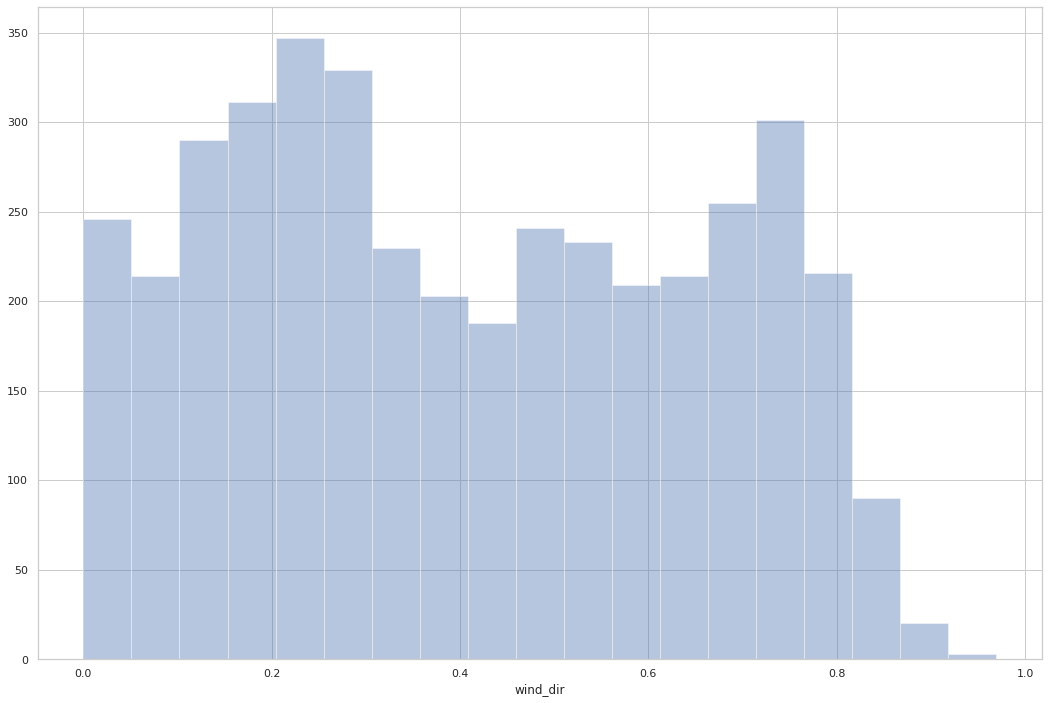

In [ ]:
sns.distplot(amount_good_dir, kde=False)

<AxesSubplot:xlabel='angle_attack'>

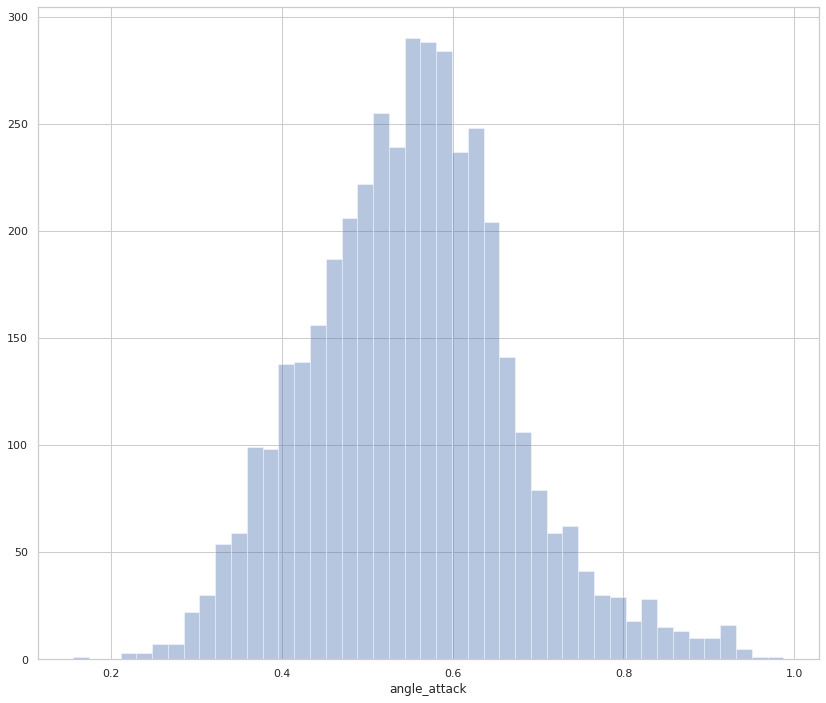

In [ ]:
sns.distplot(amount_good_aoa_strict, kde=False)

<AxesSubplot:xlabel='wind_dir'>

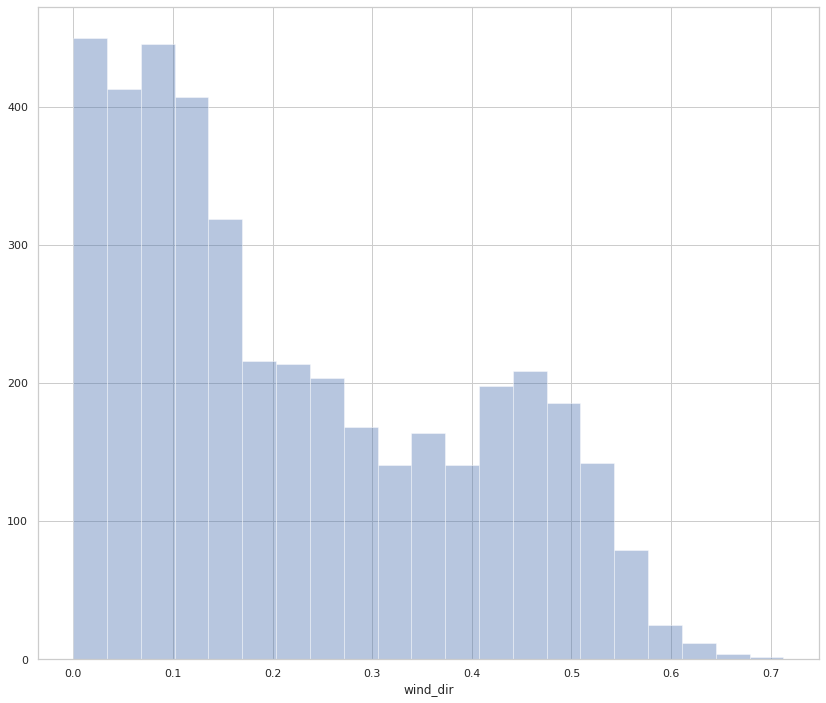

In [ ]:
sns.distplot(amount_good_dir_strict, kde=False)

#### old stuff but keep it

## Load EP data

In [ ]:
proc_dir = Path("2020_data/data_field_v2_from_20208010/processed")
proc_dir_v3 = Path("2020_data/data_field_v2_from_20208010/processed_v3")
# paths must be in order WM1, TrsH(M506), TrsV(M507)


ep_paths =[ "5min/eddypro_WM1_5min_full_output_2020-09-03T194831_exp.csv",
            "5min/eddypro_WM2_5min_full_output_2020-09-03T185900_exp.csv",
          "5min/eddypro_M506_5min_full_output_2020-09-03T195942_exp.csv",
          "5min/eddypro_M507_5min_full_output_2020-09-03T200928_exp.csv"]

ep_paths_v3 =[ "5min/eddypro_WM1_5min_full_output_2020-09-04T114322_exp.csv",
            "5min/eddypro_WM2_5min_full_output_2020-09-04T114559_exp.csv",
          "5min/eddypro_M506_5min_full_output_2020-09-04T113336_exp.csv",
          "5min/eddypro_M507_5min_full_output_2020-09-04T113641_exp.csv"]

cache_dir = Path("data_cache")

wind_cols = ['u_unrot','v_unrot', 'w_unrot', 'wind_speed', 'wind_dir', 'Tau', 'H', 'air_temperature', 'u*']
wind_comp_rename = {'u_unrot': 'u', 'v_unrot': 'v', 'w_unrot': 'w', 'air_temperature': 't'}

In [ ]:
data_ep_all = Anems(*[load_ep_cache(proc_dir / p, cache_dir= cache_dir)
    .query(date_range)
    .pipe(add_to_index, '-5min')
    .loc[:,wind_cols]
    .dropna()
    .rename(columns=wind_comp_rename)
    .pipe(add_hor_wind_speed)
    for p in ep_paths])

In [ ]:
data_ep_v3= Anems(*[
    load_ep_cache(proc_dir_v3 / p, cache_dir= cache_dir)
    .pipe(add_to_index, '-5min')
    .loc[:,wind_cols]
    .dropna()
    .rename(columns=wind_comp_rename)
    .pipe(add_hor_wind_speed)
    for p in ep_paths_v3])

In [ ]:
index = data_ep_all.WM1.index.intersection(data_ep_all.WM2.index).intersection(data_ep_all.TrsV.index).intersection(data_ep_all.TrsH.index)

In [ ]:
index_v3 = data_ep_v3.WM1.index.intersection(data_ep_v3.WM2.index)

In [ ]:
data_ep = [data_ep_all.WM1, data_ep_all.TrsH, data_ep_all.TrsV]

In [ ]:
amount_good_dir = amount_good_dir[index]
amount_good_aoa = amount_good_aoa[index]
amount_good_dir_strict = amount_good_dir_strict[index]
amount_good_aoa_strict = amount_good_aoa_strict[index]

In [ ]:
3560/4139

0.860111137956028

## Scatters

In [ ]:
plot_info_all=[{'label': 'WM1', 'color': sns.color_palette()[3]}, {'label': 'WM2', 'color': sns.color_palette()[0]}, {'label': 'TrsH', 'color': sns.color_palette()[1]}, {'label': 'TrsV', 'color': sns.color_palette()[2]}]
plot_info_trs = [{'label': 'WM1', 'color': sns.color_palette()[3]}, {'label': 'TrsH', 'color': sns.color_palette()[1]}, {'label': 'TrsV', 'color': sns.color_palette()[2]}]
plot_info_m7 = [{'label': 'WM1', 'color': sns.color_palette()[3]}, {'label': 'TrsV', 'color': sns.color_palette()[2]}]

In [ ]:
def plot_one_scatter(dfs, col, plot_info, ax=None, title=None, mask=None, index=None, unit="",  **kwargs):   
    x = dfs[0].loc[index] if index is not None else dfs[0]
    x = x[mask] if mask is not None else x
    ax = ax or get_ax()
    ax.plot(x[col],x[col], color='gray', label=f"theory", lw=1, linestyle='dashed')
    ax.set_xlabel(f"Wind Master ({unit})")
    ax.set_ylabel(f"Trisonica ({unit})")
    ax.set_title(f"{col} {title or ''} ({len(x)} points)")
    
    for i in range(len(dfs)-1):
        info = plot_info[i+1]
        y = dfs[i+1]
        
        y = y.loc[index] if index is not None else y 
        y = y[mask] if mask is not None else y
         
        ax.scatter(x[col], y[col], **info ,**kwargs)
        # do linear regression
        x_np = np.expand_dims(x[col].to_numpy(), -1) # adding empty dimension for sklearn    
        reg = LinearRegression().fit(x_np, y[col]) 
        r2 = reg.score(x_np,  y[col])
        pred_y = reg.predict(x_np)
        # plot actual regression line  
        ax.plot(x_np, pred_y, color=info['color'], label=f"{info['label']}, r^2: {r2:.2f}, slope: {reg.coef_[0]:.2f}")
    
    ax.legend()


In [ ]:
mask

DatetimeIndex(['2020-08-13 01:00:00', '2020-08-13 01:05:00',
               '2020-08-13 01:10:00', '2020-08-13 01:15:00',
               '2020-08-13 01:20:00', '2020-08-13 01:25:00',
               '2020-08-13 01:30:00', '2020-08-13 01:35:00',
               '2020-08-13 01:40:00', '2020-08-13 01:45:00',
               ...
               '2020-08-27 08:05:00', '2020-08-27 08:10:00',
               '2020-08-27 08:15:00', '2020-08-27 08:20:00',
               '2020-08-27 08:25:00', '2020-08-27 08:30:00',
               '2020-08-27 08:35:00', '2020-08-27 08:40:00',
               '2020-08-27 08:45:00', '2020-08-27 08:50:00'],
              dtype='datetime64[ns]', name='date_time', length=3563, freq=None)

In [ ]:
len(mask)

3563

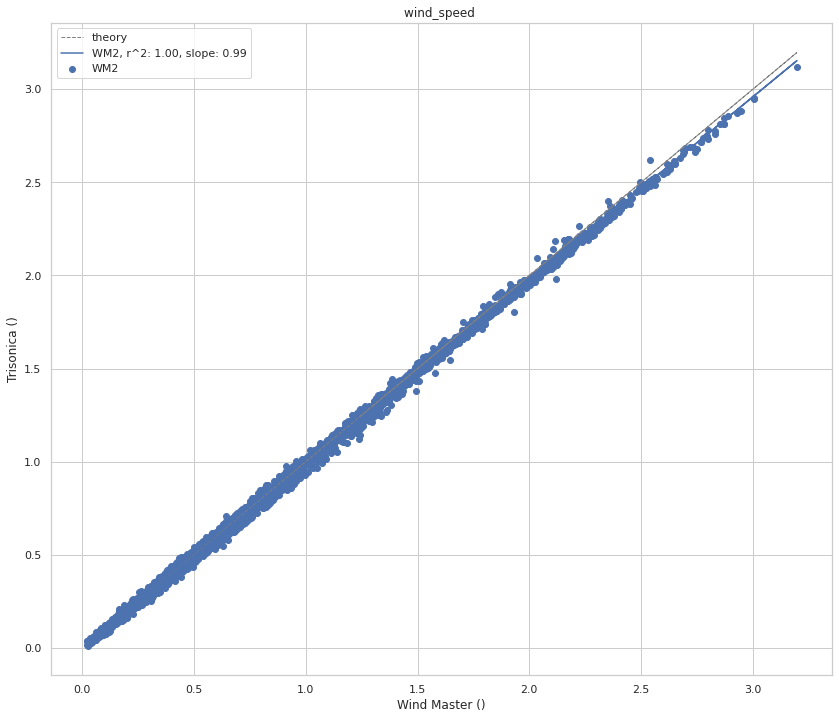

In [ ]:
plot_one_scatter([data_ep_all.WM1, data_ep_all.WM2], 'wind_speed', plot_info_all, index=index)

In [ ]:
mask = mask

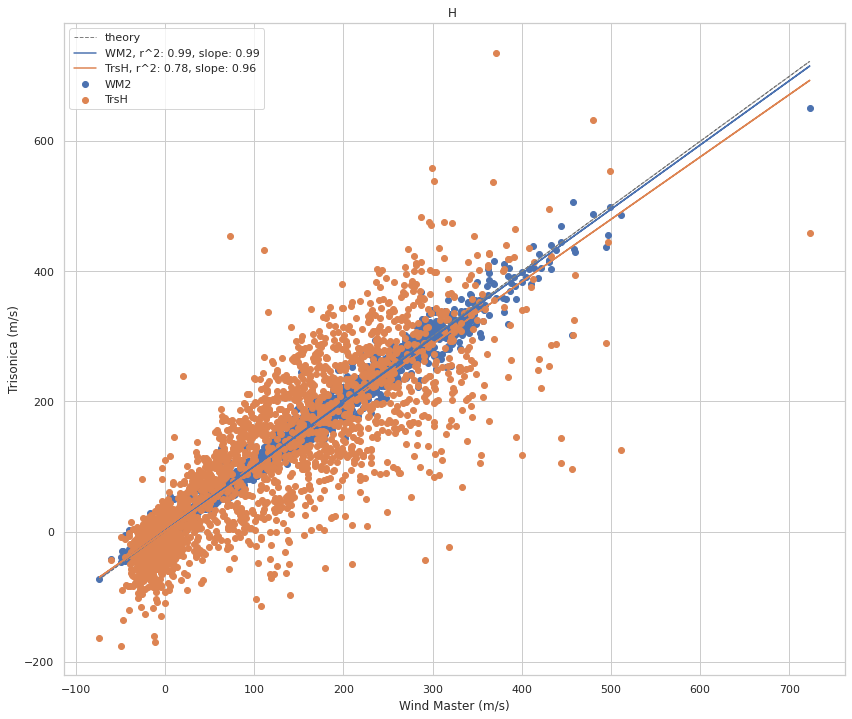

In [ ]:
plot_one_scatter([data_ep_all.WM1, data_ep_all.WM2, data_ep_all.TrsV], 'H', plot_info_all, index=index, unit="m/s")

# The story begins

we can see that ,as expected ,the both Trisonica measures well wind speed

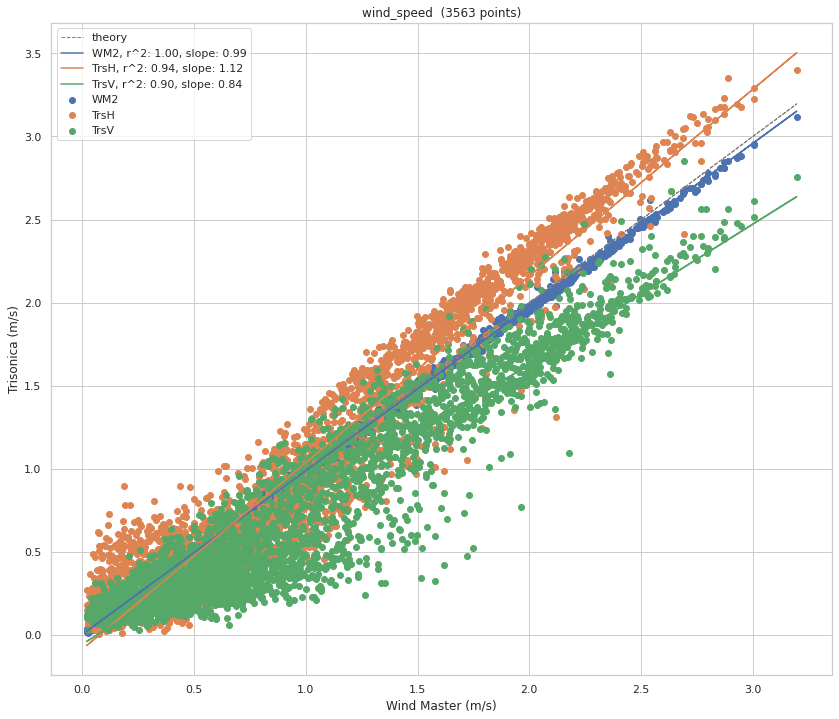

In [ ]:
plot_one_scatter(data_ep_all, 'wind_speed', plot_info_all, index=index, unit="m/s")

**PER QUANTO RIGUARDA LA DIREZIONE NON SO CHE GRAFICO METTERE? WINDOROSE? MA PENSO CHE POSSIAMO ANCHE IGNORARLO**

the TrsH understimates the wind speed and this can be explained with the fact that it is severally limited in the wind directions

Sonic anemometers measures temperature as well, which is not great in absolute terms but there is still an high correlation between them. Moreover there is also a disagreement between the two windmasters. This temperature measurements can still be okay for fluxes

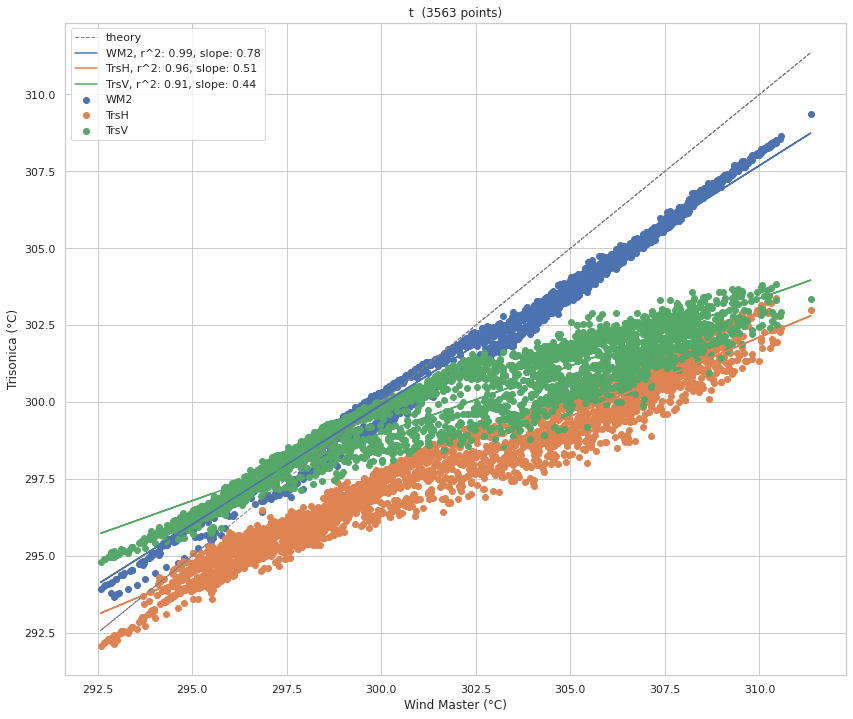

In [ ]:
plot_one_scatter(data_ep_all, 't', plot_info_all, index=index, unit="°C")

The variable we are interested in is the vertical compoment of the wind that is the one used to compute fluxes

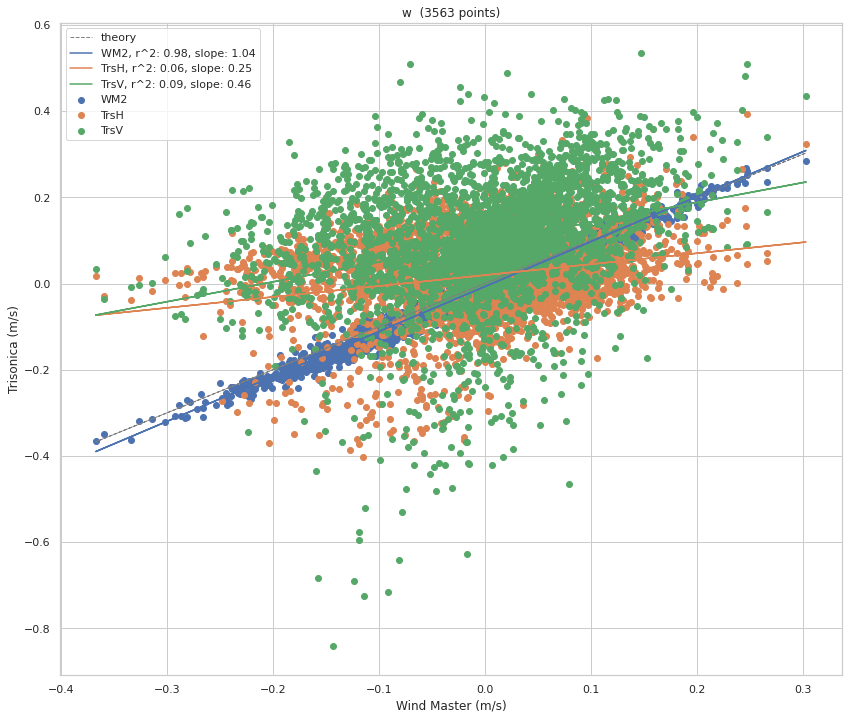

In [ ]:
plot_one_scatter(data_ep_all, 'w', plot_info_all, index=index, unit="m/s")

there is a rather bad correlation between the w measured by the wind masters and the Trisonica. However the wind speed has small variations and the mean tend always to be zero, therefore is difficult to compare directly.

We are going to compare the sensible heat fluxes which are more representative for  eddy covariance 

you can see that the Trisonica mounted vertically measures the fluxes with a good accuracy even if is not precise. While the TrsH consistently understimate the fluxes

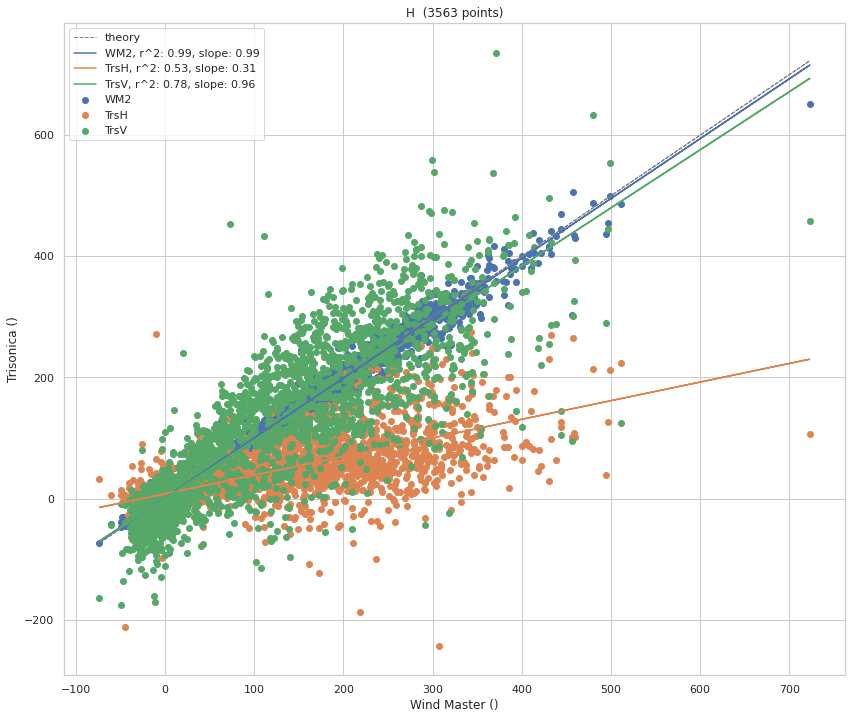

In [ ]:
plot_one_scatter(data_ep_all, 'H', plot_info_all, index=index, unit='W/m²')

all the plots so far has been made with all the data, even though the range of TrsH and TrsV is in theory limited. So we are going to filter to see if their measurements improves.  
The first step is filtering when at least 75% of the wind is from the direction TrsV can measure (+/- 30 and 180 +/- 30)

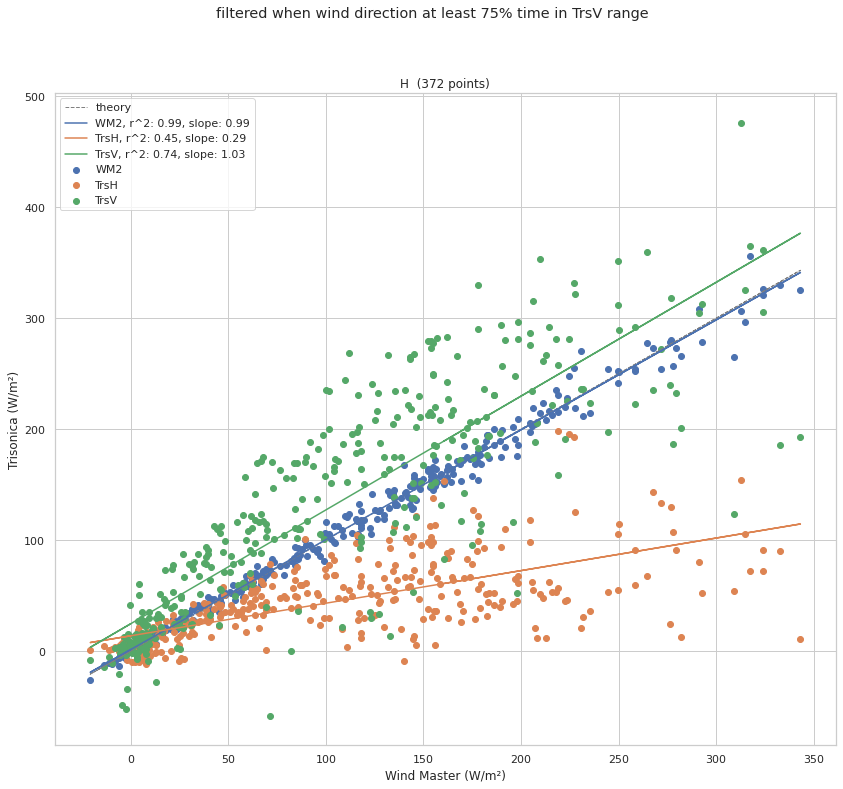

In [ ]:
plot_one_scatter(data_ep_all, 'H', plot_info_all, index=index, mask=amount_good_dir > .75, unit='W/m²')
plt.suptitle("filtered when wind direction at least 75% time in TrsV range");

There is not significate change in the sensor performance

we now filter when the angle of attack is inside the TrsH range for at least 90% of the time

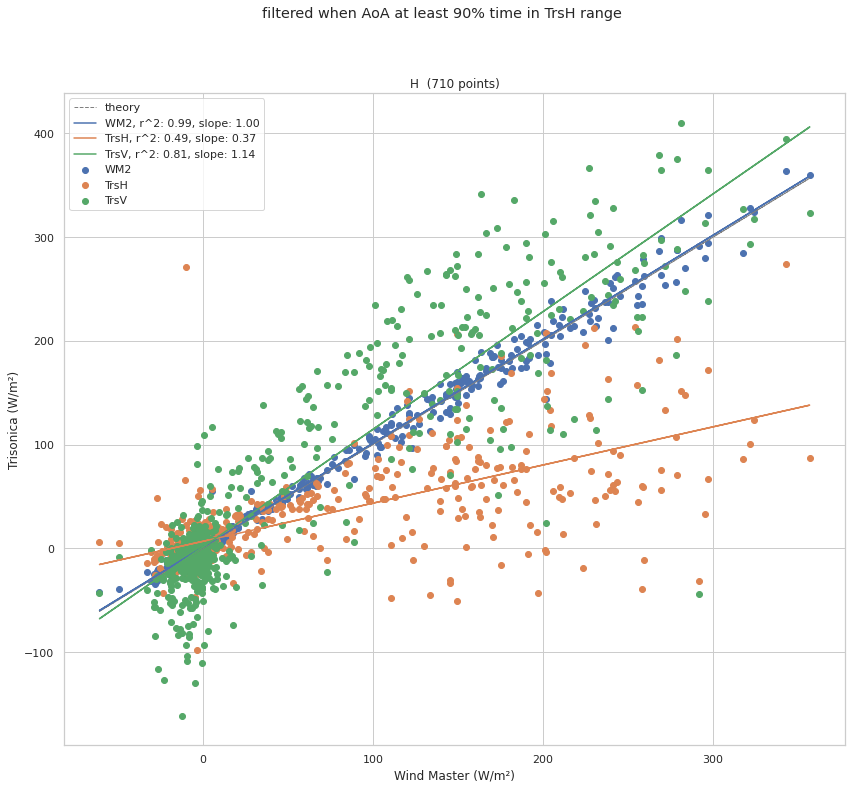

In [ ]:
plot_one_scatter(data_ep_all, 'H', plot_info_all, index=index, mask=amount_good_aoa > .9, unit='W/m²')
plt.suptitle("filtered when AoA at least 90% time in TrsH range");

we would expect that the TrsH should perform better but this is not the case

we can filter when the majority of the angle of attacks are inside the range of TrsH and the majority of directions are in the TrsV range, where both anemometers should have a good performance

<Figure size 1008x864 with 0 Axes>

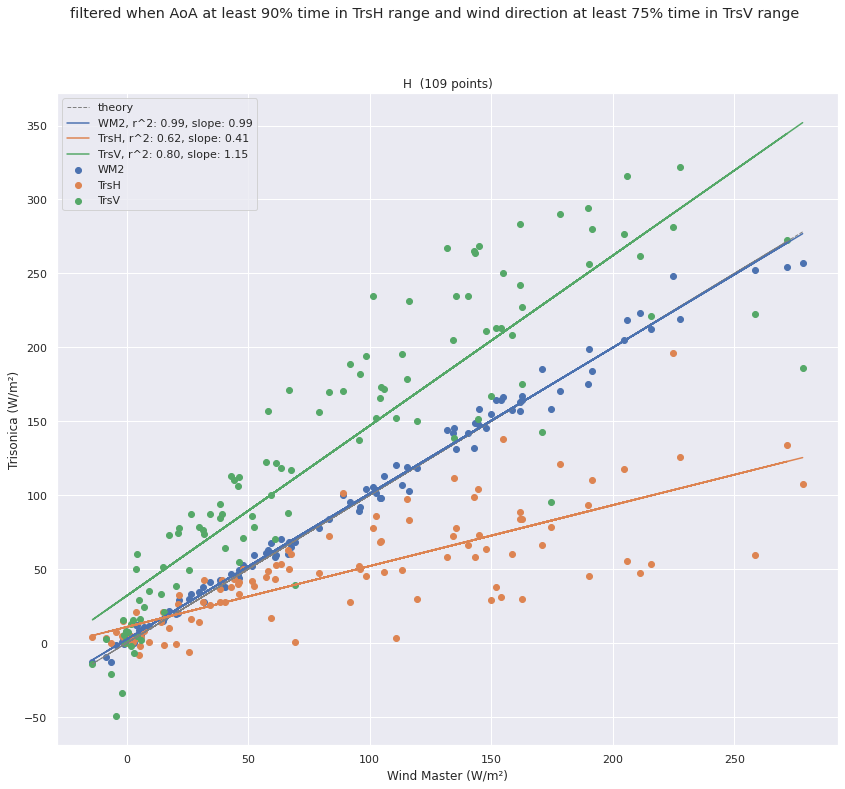

In [ ]:
plot_one_scatter(data_ep_all, 'H', plot_info_all, index=index, mask=(amount_good_aoa > .9) & (amount_good_dir > .75) , unit='W/m²)
plt.suptitle("filtered when AoA at least 90% time in TrsH range and wind direction at least 75% time in TrsV range");
plt.savefig('filtered.png', dpi=300)

we then tried to filter when there was more wind with high angle of attacks (at least 30% of the wind from angle of attacks > 30°).    
The TrsV performance decreases (ipotesi per spiegarlo) while the poor performance of the TrsH remains constant 

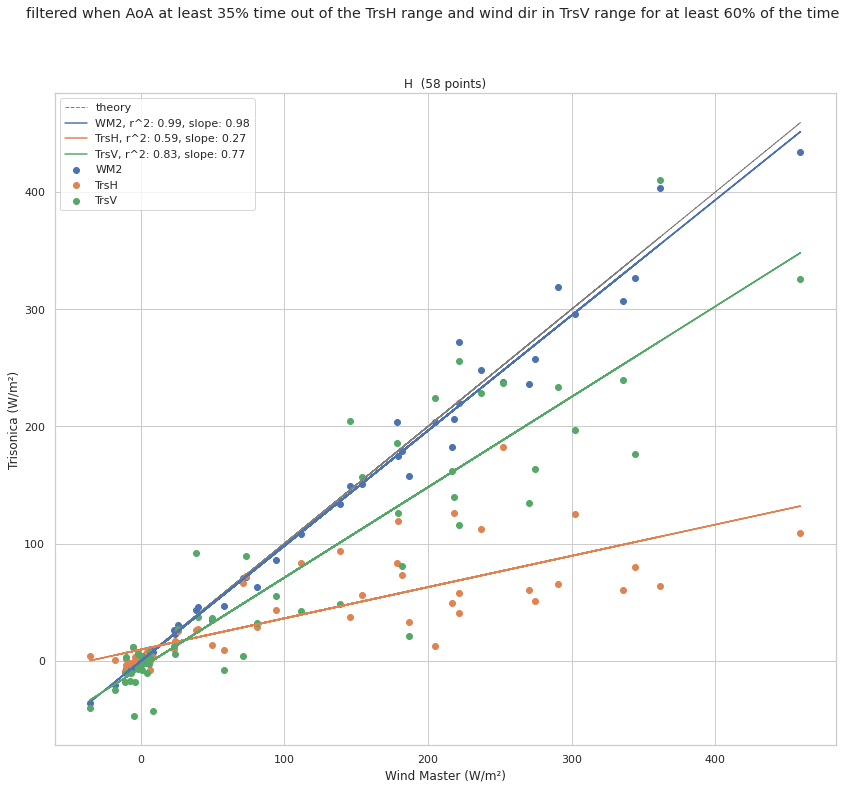

In [ ]:
plot_one_scatter(data_ep_all, 'H', plot_info_all, index=index, mask=(amount_good_aoa < .75) & (amount_good_dir >.6), unit='W/m²')
plt.suptitle("filtered when AoA at least 35% time out of the TrsH range and wind dir in TrsV range for at least 60% of the time");

In [ ]:
mask=(amount_good_aoa < .7) & (amount_good_dir >.6)

In [ ]:
amount_good_dir[mask]

date_time
2020-08-13 15:25:00    0.620333
2020-08-13 20:30:00    0.683000
2020-08-14 09:15:00    0.671000
2020-08-15 19:10:00    0.621333
2020-08-18 23:05:00    0.603333
2020-08-21 11:20:00    0.658667
2020-08-22 11:20:00    0.604000
2020-08-23 10:25:00    0.638333
2020-08-23 17:10:00    0.628333
2020-08-23 20:35:00    0.735333
2020-08-24 10:55:00    0.622333
2020-08-26 00:10:00    0.605333
2020-08-26 21:40:00    0.627333
2020-08-26 22:15:00    0.625667
Name: wind_dir, dtype: float64

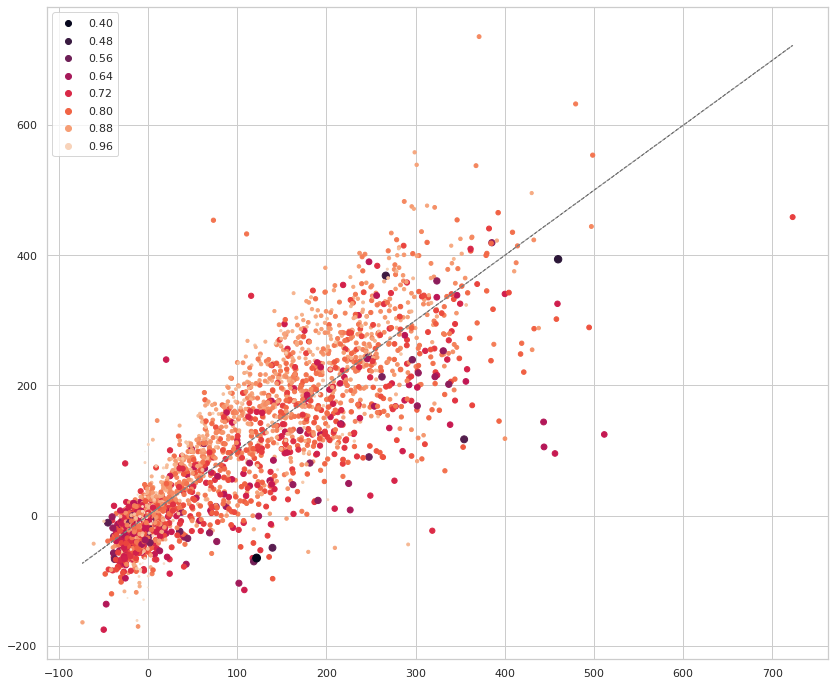

In [ ]:
scatter = plt.scatter(data_ep_all.WM1.loc[index].H, data_ep_all.TrsV.loc[index].H, s=(1-amount_good_aoa)*100, c=amount_good_aoa)
plt.legend(*scatter.legend_elements())
plt.plot(data_ep_all.WM1.loc[index].H, data_ep_all.WM1.loc[index].H, lw=1, linestyle='dashed', color='gray')

In [ ]:
amount_good_dir[amount_good_aoa < .7].mean()

0.3693264957264957

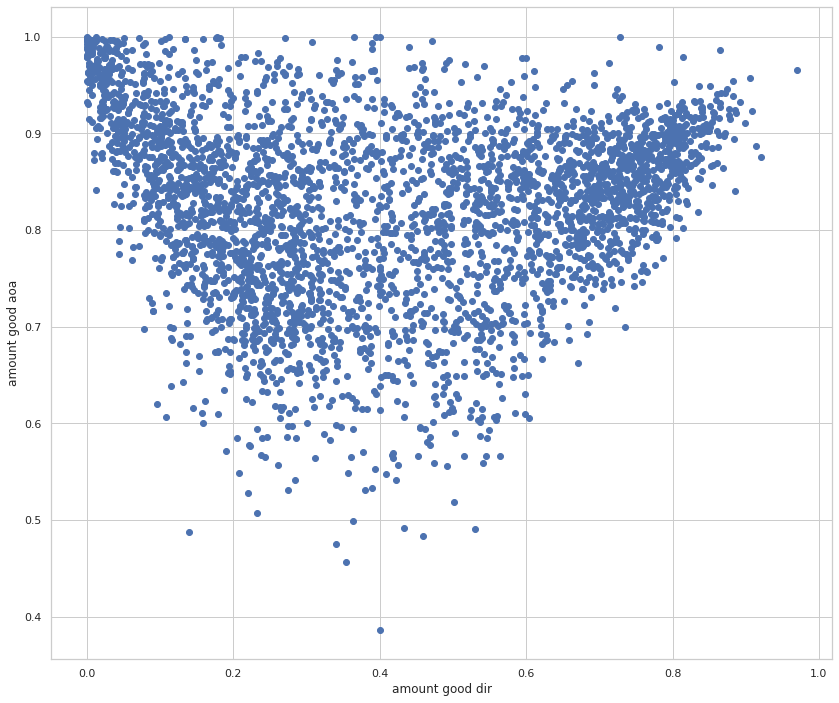

In [ ]:
plt.scatter(amount_good_dir, amount_good_aoa)
plt.ylabel("amount good aoa")
plt.xlabel("amount good dir");

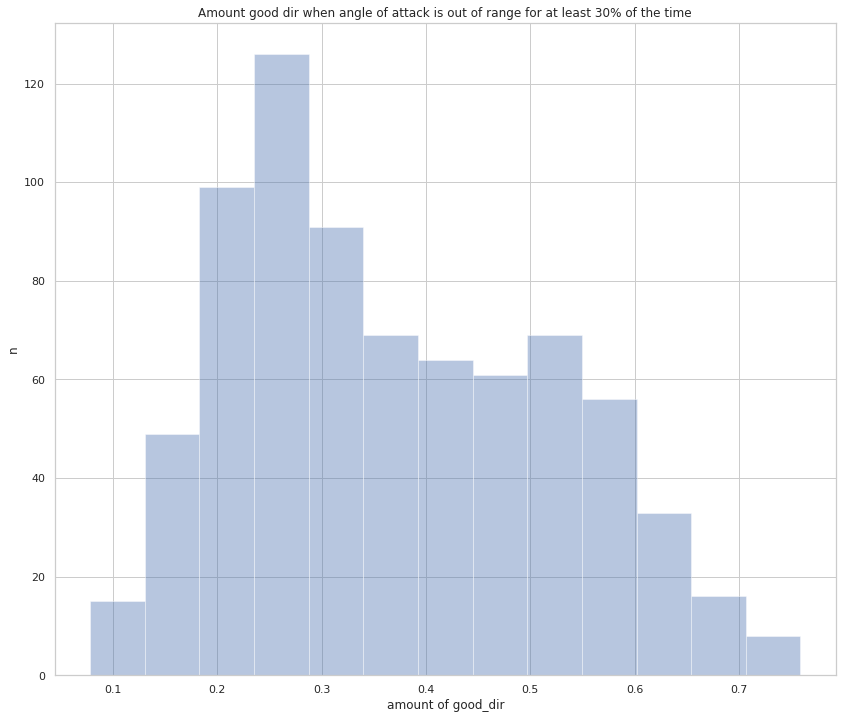

In [ ]:
sns.distplot(amount_good_dir[amount_good_aoa < .75], kde=False)
plt.title("Amount good dir when angle of attack is out of range for at least 30% of the time")
plt.ylabel("n")
plt.xlabel("amount of good_dir");

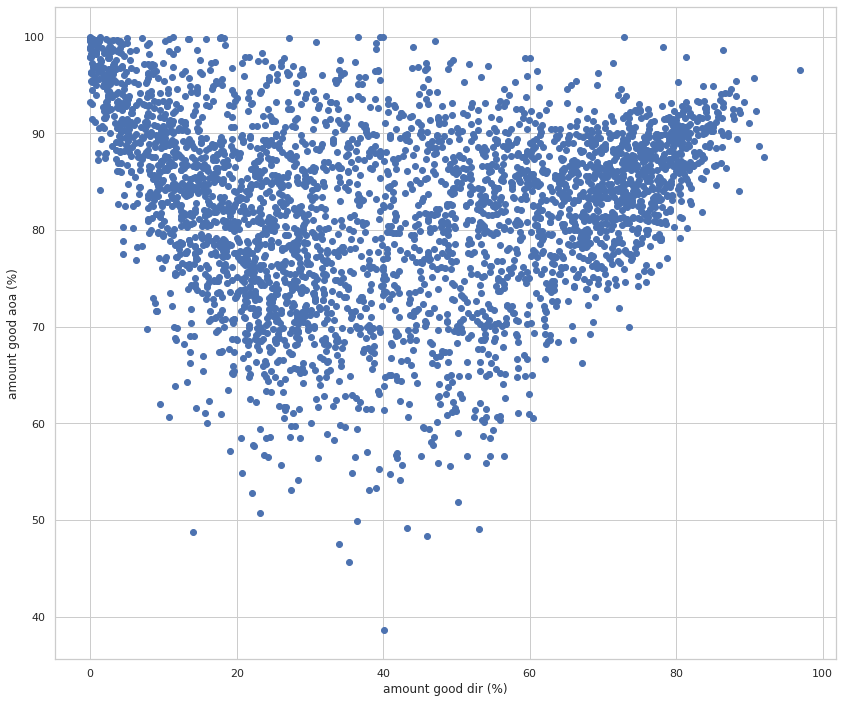

In [ ]:
plt.scatter(amount_good_dir*100, amount_good_aoa*100)
plt.ylabel("amount good aoa (%)")
plt.xlabel("amount good dir (%)");

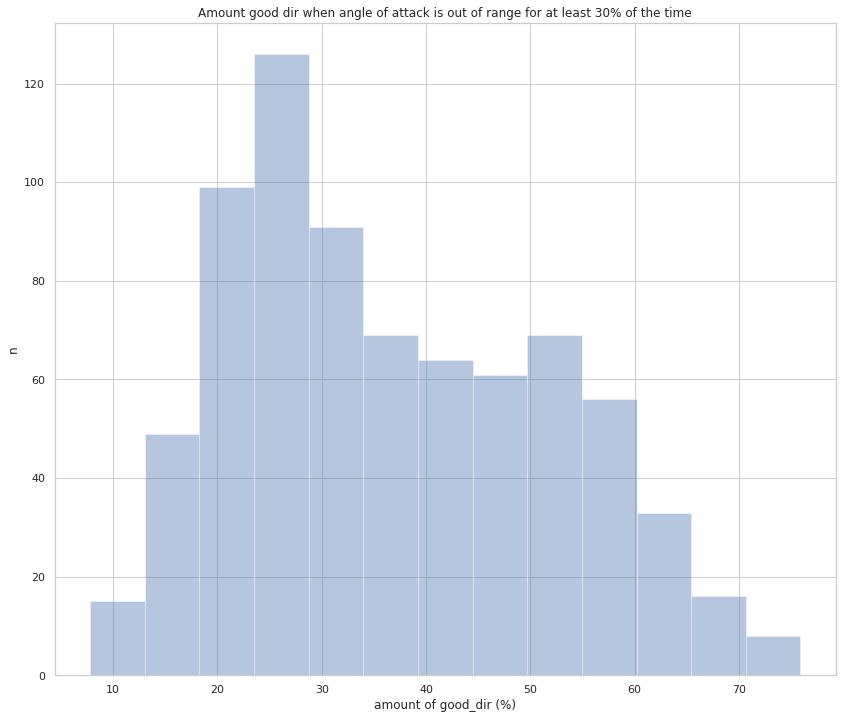

In [ ]:
sns.distplot(amount_good_dir[amount_good_aoa < .75] *100, kde=False)
plt.title("Amount good dir when angle of attack is out of range for at least 30% of the time")
plt.ylabel("n")
plt.xlabel("amount of good_dir (%)");

<AxesSubplot:xlabel='wind_dir'>

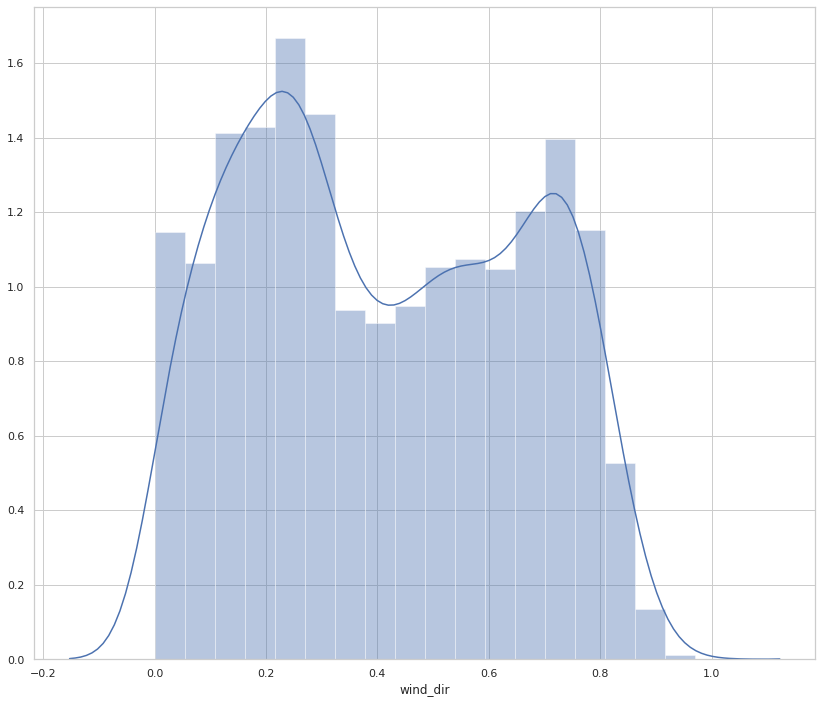

In [ ]:
sns.distplot(amount_good_dir)

In [ ]:
plt.scatter(int(amount_good_dir*100), int(amount_good_aoa*100))
plt.ylabel("amount good aoa (%)")
plt.xlabel("amount good dir (%)");

NameError: name 'plt' is not defined

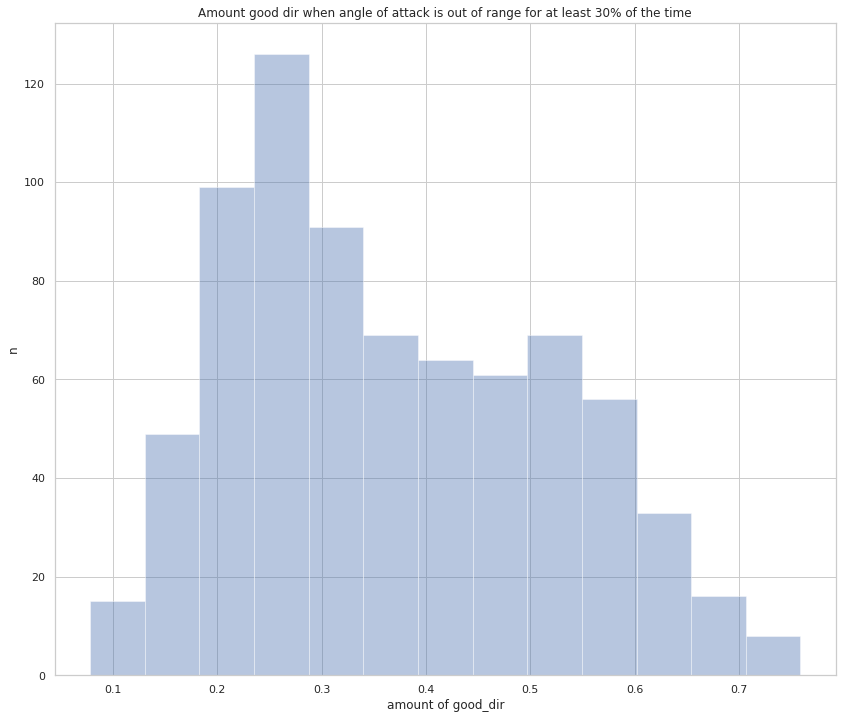

In [ ]:
sns.distplot(int(amount_good_dir[amount_good_aoa < .75] *100), kde=False)
plt.title("Amount good dir when angle of attack is out of range for at least 30% of the time")
plt.ylabel("n")
plt.xlabel("amount of good_dir (%));

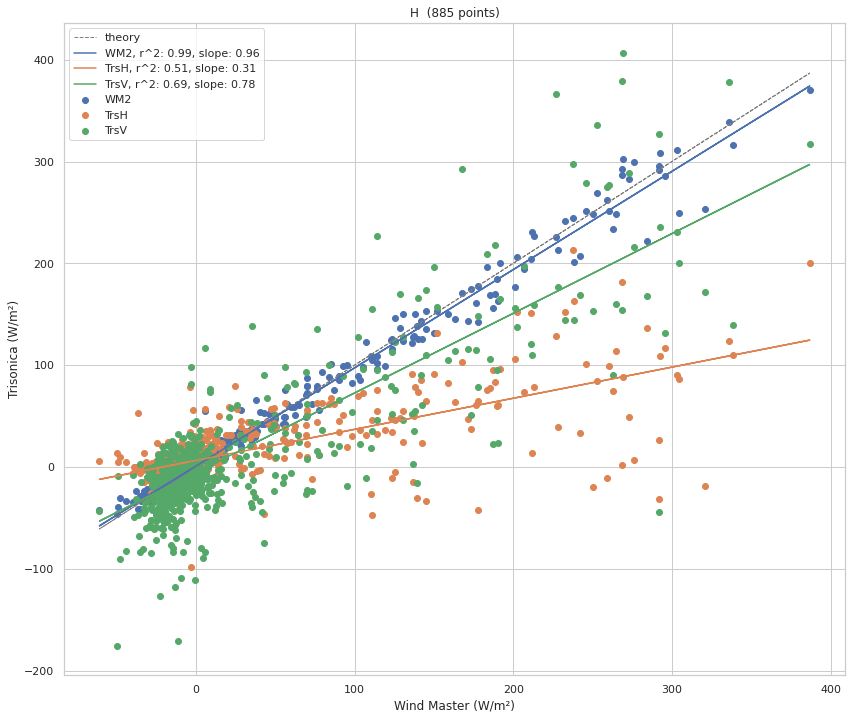

In [ ]:
plot_one_scatter(data_ep_all, 'H', plot_info_all, index=index, mask=(amount_good_dir < .20) , unit='W/m²')

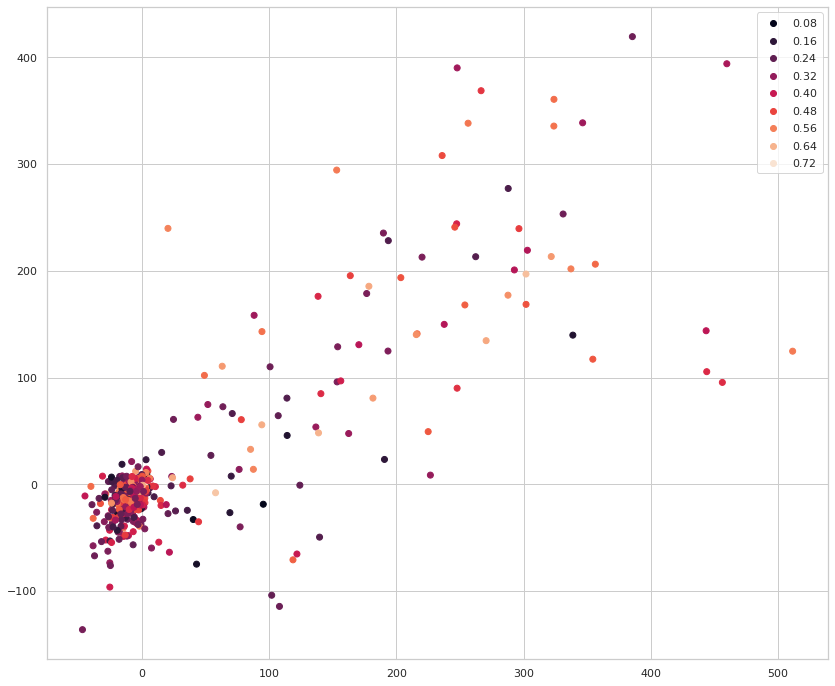

In [ ]:
scatter = plt.scatter(data_ep_all.WM1.loc[index][amount_good_aoa < .7].H, data_ep_all.TrsV.loc[index].H[amount_good_aoa < .7], c=amount_good_dir[amount_good_aoa < .7])
plt.legend(*scatter.legend_elements())

### Further tests

we can try to have stricter limits in the range of the Trisonica to see if they can measure when the angle of attack is between a smaller range

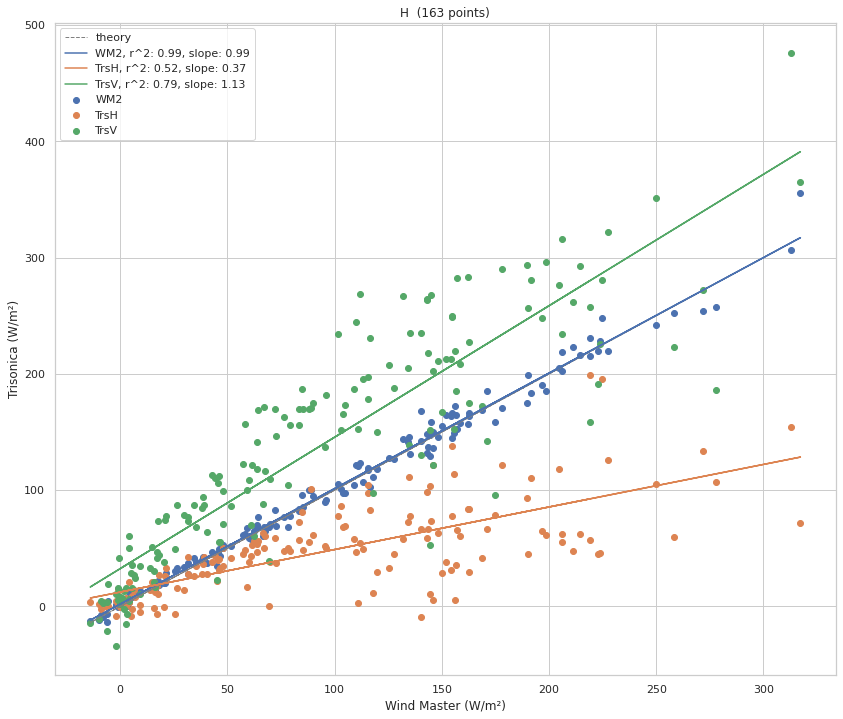

In [ ]:
plot_one_scatter(data_ep_all, 'H', plot_info_all, index=index, mask=(amount_good_aoa_strict > .60) & (amount_good_dir_strict > .50) , unit='W/m²')

there is not a significant change in the performance of the sensors even for smaller ranges

we also tried to swap the sensors to see if the performance the error was related to the anemometers or to the their position

**DA CAPIRE CHE FARE AL LIMITE NON LO METTIAMO NELLA TESI**

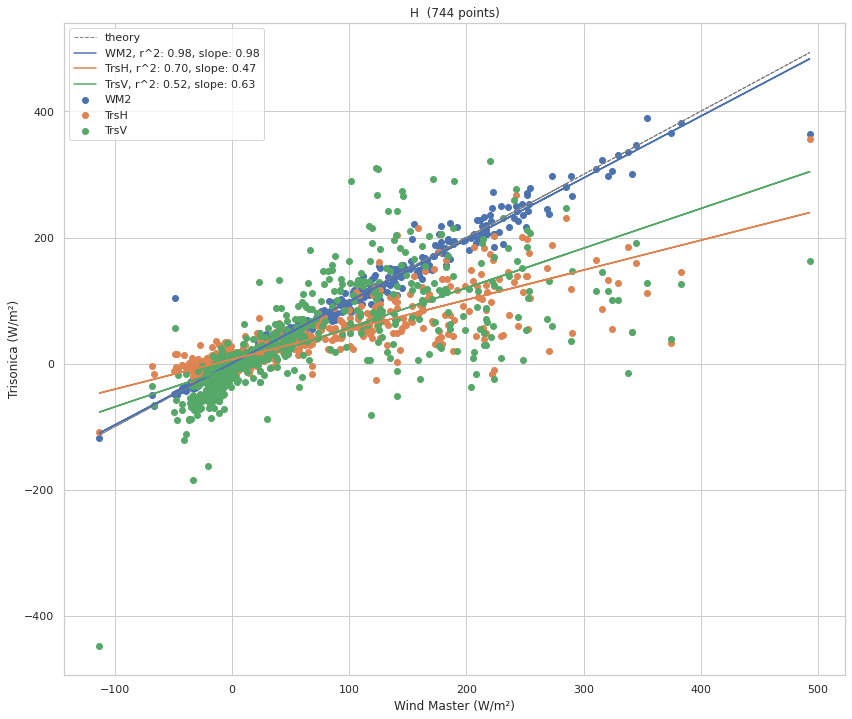

In [ ]:
plot_one_scatter(data_ep_v3, 'H', plot_info_all, index=index_v3, unit='W/m²')

In [ ]:
mask = data_ep_v3.TrsV.H > -200

/home/simone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/simone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/simone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/simone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


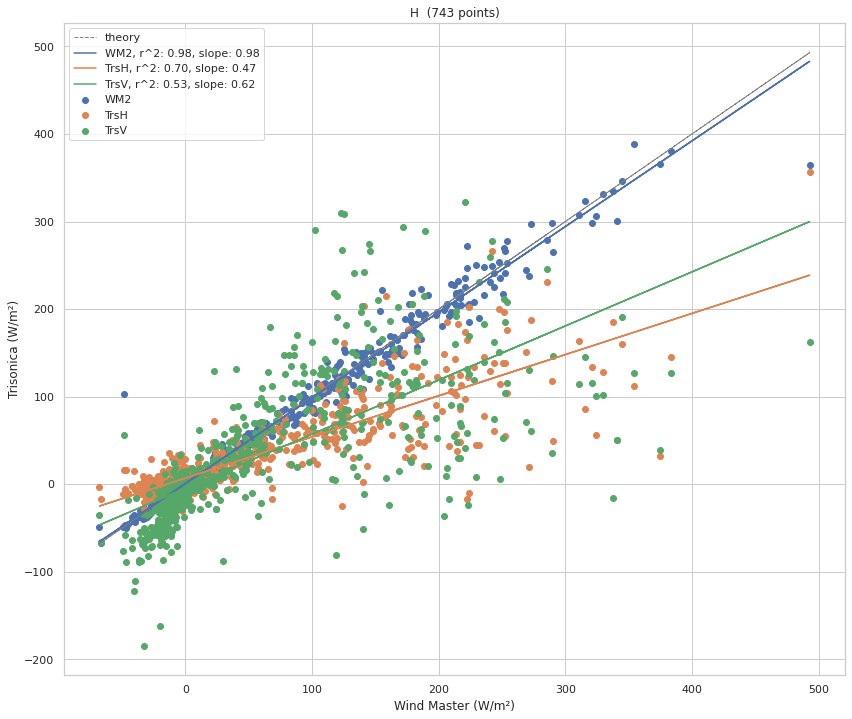

In [ ]:
plot_one_scatter(data_ep_v3, 'H', plot_info_all, index=index_v3, unit='W/m²', mask=mask)

## Conclusions

In the area the majority of the strong wind was in the sector that the TrsH measured so worked even without many filters


In this experiment we can see that the Trisonica can be used to measure the fluxes if mounted vertically, while the horizontal one performed poorly even if there was a low turbolence and low angle of attacks